# XGBoost (clasificación supervisada)

XGBoost (Extreme Gradient Boosting) es un modelo de machine learning supervisado y se utiliza comúnmente en tareas de clasificación y regresión.

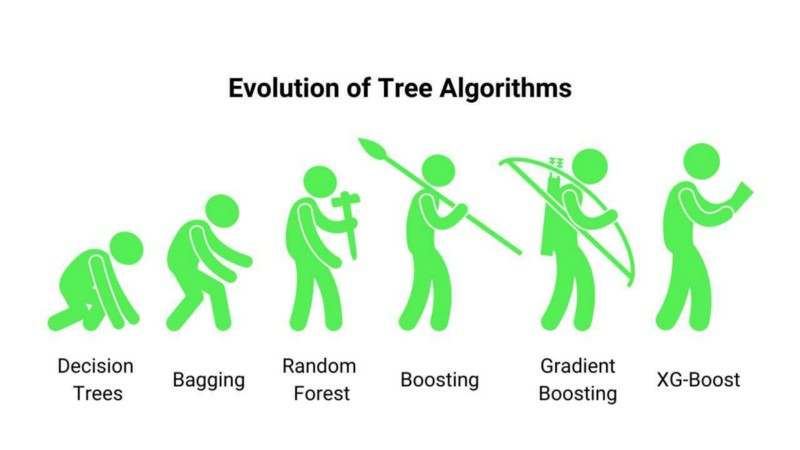

XGBoost utiliza el principio de **boosting**:

La idea detrás del boosting es generar múltiples modelos de predicción “débiles” secuencialmente, y que cada uno de estos tome los resultados del modelo anterior, para generar un modelo más “fuerte”, con mejor poder predictivo y mayor estabilidad en sus resultados.

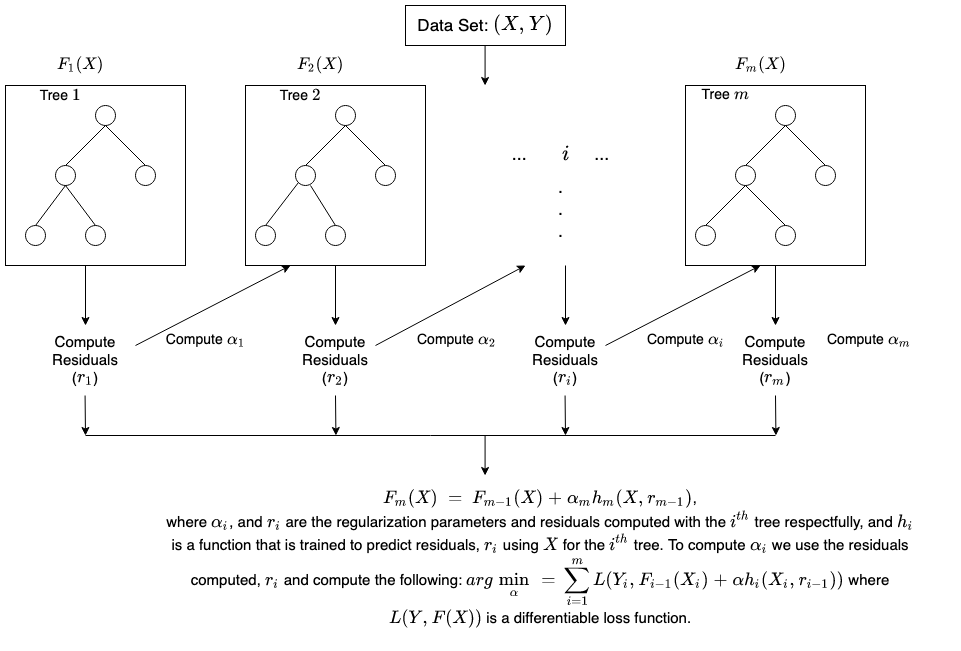

Este proceso se repite hasta llegar a un punto en el que la diferencia entre modelos consecutivos es insignificante (donde converge), lo cual nos indica que hemos encontrado el mejor modelo posible, o cuando se llega al número de iteraciones máximas definido por el usuario.

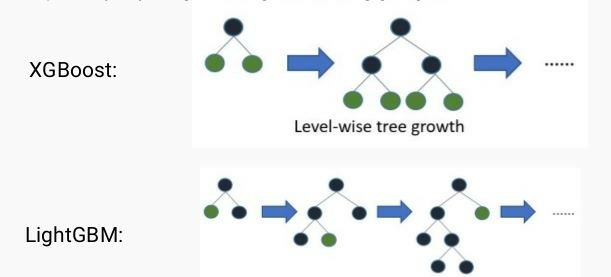

https://medium.com/@jboscomendoza/tutorial-xgboost-en-python-53e48fc58f73


In [63]:
import pandas as pd

# Cargar datos. Vamos a utilizar el conjunto de datos de flores Iris:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
# El parámetro header=None se utiliza para indicar que el conjunto de datos no tiene una fila de encabezado en el archivo CSV

# Pandas asigna nombres de columna predeterminados (0, 1, 2, etc.) a cada columna. Renombramos:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
# Convertirmos las etiquetas de texto iris["class"] en etiquetas numéricas iris['target']
# Usamos la función LabelEncoder de la librería Scikit-Learn

from sklearn.preprocessing import LabelEncoder

# Crea un objeto LabelEncoder
le = LabelEncoder()

# Codifica las etiquetas de texto en etiquetas numéricas
iris['target'] = le.fit_transform(iris['class'])

# Muestra algunos registros del conjunto de datos con las etiquetas numéricas
print(iris.sample(10))

     sepal_length  sepal_width  petal_length  petal_width            class  \
30            4.8          3.1           1.6          0.2      Iris-setosa   
74            6.4          2.9           4.3          1.3  Iris-versicolor   
10            5.4          3.7           1.5          0.2      Iris-setosa   
121           5.6          2.8           4.9          2.0   Iris-virginica   
9             4.9          3.1           1.5          0.1      Iris-setosa   
25            5.0          3.0           1.6          0.2      Iris-setosa   
17            5.1          3.5           1.4          0.3      Iris-setosa   
14            5.8          4.0           1.2          0.2      Iris-setosa   
63            6.1          2.9           4.7          1.4  Iris-versicolor   
86            6.7          3.1           4.7          1.5  Iris-versicolor   

     target  
30        0  
74        1  
10        0  
121       2  
9         0  
25        0  
17        0  
14        0  
63        1  
8

***

# XGBoost

In [65]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(['target', 'class'], axis=1), iris['target'], test_size=0.3, random_state=0)

In [67]:
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss',
    'seed': 0
}

- objective: Esta es la función de pérdida que se utiliza en la optimización del modelo. En este caso, se utiliza multi:softmax para indicar que el modelo se entrenará para la clasificación multiclase.

- num_class: El número de clases en el problema de clasificación multiclase. En este caso, hay tres clases en el conjunto de datos.

- max_depth: La profundidad máxima del árbol de decisión. Un árbol más profundo puede capturar relaciones más complejas en los datos, pero también puede conducir a un mayor sobreajuste.

- eta: La tasa de aprendizaje, que controla la velocidad a la que el modelo aprende. Un valor más bajo de eta significa que el modelo aprenderá más lentamente, pero puede ser más robusto frente al sobreajuste.

- subsample: El porcentaje de muestras que se utilizarán para cada árbol. Un valor más bajo de subsample significa que el modelo utilizará menos muestras para cada árbol, lo que puede ser útil para reducir el sobreajuste.

- colsample_bytree: El porcentaje de características que se utilizarán para cada árbol. Un valor más bajo de colsample_bytree significa que el modelo utilizará menos características para cada árbol, lo que puede ser útil para reducir el sobreajuste.

- eval_metric: La métrica de evaluación que se utilizará para evaluar el rendimiento del modelo. En este caso, se utiliza mlogloss, que es la pérdida logarítmica multinomial.

- seed: La semilla aleatoria que se utilizará para la reproducibilidad del modelo.

In [68]:
# Se utiliza la sintaxis de doble asterisco ** para desempaquetar un diccionario
# y pasar sus valores como argumentos de palabras clave a una función. Esto es
# útil cuando se tienen muchos parámetros y se desea pasarlos en un diccionario
# para hacer el código más legible y fácil de mantener.
model = XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=3, num_parallel_tree=None, ...)

In [69]:
y_pred = model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: %.2f%%" % (accuracy * 100.0))

Precisión: 97.78%


In [71]:
# Sacamos por pantalla los datos de test, junto con la predicción, los resultados esperados y booleano de acierto
df = X_test

# Convertir las etiquetas numéricas de vuelta a etiquetas de texto usando LabelEncoder
# Usar el método inverse_transform() del objeto LabelEncoder
df["prediccion"] = le.inverse_transform(y_pred)

df["real"] = y[X_test.index]
df["acierto"] = (df["prediccion"] == df["real"])

df

,sepal_length,sepal_width,petal_length,petal_width,prediccion,real,acierto
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica,True
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor,True
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa,True
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,True
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,True
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,True
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa,True
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,True
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor,True
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor,True


In [74]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int32)

In [75]:
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
61     1
92     1
112    2
2      0
141    2
43     0
10     0
Name: target, dtype: int64

***

# Matriz de confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una **matriz de confusión** es una herramienta que permite la visualización del desempeño (rendimiento) de un algoritmo de **aprendizaje supervisado**.

La matriz muestra el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN) que resultaron del modelo de clasificación.

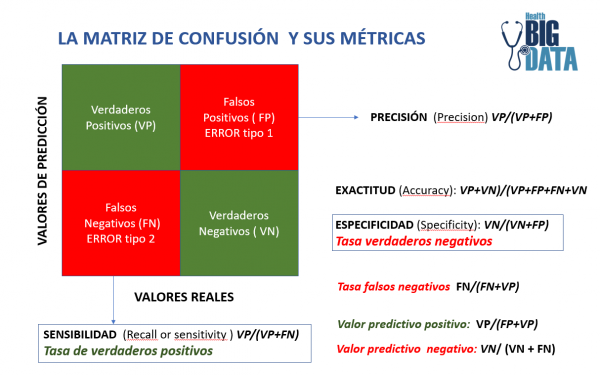

In [73]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


En esta matriz de confusión se interpreta lo siguiente:

 - El modelo clasificó 16 muestras correctamente como la primera clase (TP), y no se produjo ningún error en la clasificación de esta clase (FP = 0, FN = 0).

 - El modelo clasificó 17 muestras correctamente como la segunda clase (TP), y se produjo un error en la clasificación de una muestra de esta clase (FP = 0, FN = 1).

 - El modelo clasificó 11 muestras correctamente como la tercera clase (TP), y no se produjo ningún error en la clasificación de esta clase (FP = 0, FN = 0).

En general, una matriz de confusión ideal tendría valores no nulos únicamente en su diagonal principal, lo que indicaría que el modelo está clasificando todas las muestras correctamente. En este caso, el modelo parece estar clasificando correctamente la mayoría de las muestras, con solo un error en la clasificación de una muestra de la segunda clase.

***

# Ejercicio

Realizar predicción similar con XGBoost en el data set de cancer de mama:

```python
from sklearn import datasets
datasets.load_breast_cancer()
```